In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('Height-Weight Data.csv')

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.shape

(3501, 2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [6]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


Text(0, 0.5, 'Weight')

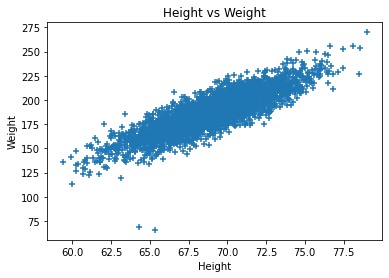

In [7]:
plt.scatter(df[['Height']], df['Weight'], marker='+')
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

In [8]:
x= df[['Height']]
y= df['Weight']

In [9]:
from sklearn.model_selection import train_test_split as tts

In [10]:
xtrain, xtest, ytrain, ytest= tts(x,y,train_size=.80,random_state=1) 

In [11]:
xtrain.shape

(2800, 1)

In [12]:
xtrain.head()

,Height
3246,69.575891
2118,63.992899
2583,67.174715
432,68.921041
1724,67.140186


In [13]:
ytrain.head()

3246    206.600442
2118    154.963174
2583    178.674938
432     188.328807
1724    188.848499
Name: Weight, dtype: float64

In [14]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression() #creating object for linear_model
lr.fit(xtrain, ytrain) #train the ML model ; xtrain=x ; ytrain=y

LinearRegression()

In [15]:
lr.predict([[71.730978]])

array([202.95724409])

In [16]:
lr.coef_

array([5.97800913])

In [17]:
lr.intercept_

-225.8511972451223

In [18]:
m= lr.coef_
c= lr.intercept_
x= 71.730978
y= (m*x)+c
y

array([202.95724409])

In [19]:
lr.predict(df[['Height']])

array([215.60694467, 185.32765309, 217.17968935, ..., 215.99869634,
       177.04283025, 208.98302947])

In [20]:
df['Predicted Weight']= lr.predict(df[['Height']])

In [21]:
df

,Height,Weight,Predicted Weight
0,73.847017,241.893563,215.606945
1,68.781904,162.310473,185.327653
2,74.110105,212.740856,217.179689
3,71.730978,220.042470,202.957246
4,69.881796,206.349801,191.902816
...,...,...,...
3496,69.296830,185.649086,188.405885
3497,70.542201,210.198845,195.850727
3498,73.912549,202.429960,215.998696
3499,67.396021,144.277671,177.042830


In [22]:
testing= lr.predict(xtest) #predicted ytest

In [23]:
testing 

array([177.08348257, 189.97931446, 167.56105707, 178.78547886,
       163.18509437, 180.25519153, 187.5746301 , 177.29406308,
       187.61410451, 214.82687791, 146.54705769, 205.53609201,
       178.63524049, 182.16876965, 221.10928254, 196.04746384,
       174.66519041, 180.50000529, 174.52687291, 219.61734596,
       209.17973484, 180.29820038, 166.30726829, 190.45561742,
       162.41180308, 186.69252404, 190.41647904, 179.34185839,
       161.77205047, 181.25788043, 147.18573982, 201.08593379,
       189.09154018, 206.86396518, 194.06129799, 163.9082029 ,
       219.63585423, 178.135123  , 190.46824322, 161.75211608,
       192.0001994 , 180.53363931, 191.18625621, 183.69534066,
       193.07163212, 214.25906472, 176.83242358, 197.31231182,
       190.08986292, 185.13039464, 181.43816242, 201.55338182,
       173.80328673, 177.33236514, 159.2015133 , 161.11684495,
       195.53300295, 141.6637074 , 137.1399713 , 181.00515179,
       177.46765825, 190.22587781, 205.84453492, 171.14

In [24]:
ytest #actual result

719     192.672676
2296    187.491501
3083    191.563495
1296    177.909685
2234    165.313807
           ...    
1263    193.509269
1144    193.367198
3063    181.674739
1854    220.866365
1409    201.438831
Name: Weight, Length: 701, dtype: float64

In [25]:
xtest['Predicted testing']=  lr.predict(xtest)

In [26]:
xtest.head()

,Height,Predicted testing
719,67.402821,177.083483
2296,69.560033,189.979314
3083,65.809912,167.561057
1296,67.687531,178.785479
2234,65.077902,163.185094


In [27]:
xtest= xtest[['Height']]

In [28]:
from sklearn.metrics import mean_squared_error #mse
pred= lr.predict(xtest)
mse= mean_squared_error(ytest, pred) #testing error

In [29]:
mse

106.01679593408504

In [30]:
from sklearn.metrics import mean_absolute_error

In [31]:
mean_absolute_error(ytest, pred) #MAE

8.336615810349368

Text(0, 0.5, 'Weight')

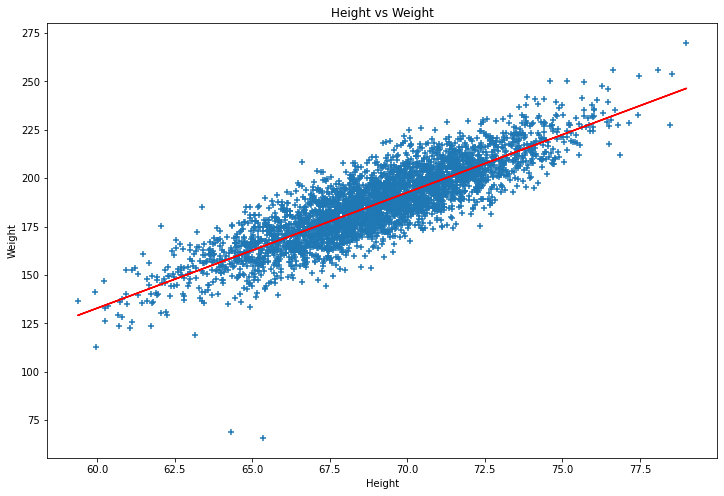

In [32]:
plt.figure(figsize=(12,8))
plt.scatter(df[['Height']], df['Weight'], marker='+')
plt.plot(df[['Height']] , lr.predict(df[['Height']]), color='red')
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')

In [33]:
lr.score(xtest, ytest) # R Squared Value

0.7437517146778504

In [34]:
lr.score(xtrain, ytrain) # R Squared Value

0.729271763964062

In [35]:
lr.score(df[['Height']], df['Weight'])

0.7323178174877905